# 多图合并展示

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 多图，xy轴设置，还有一条直线

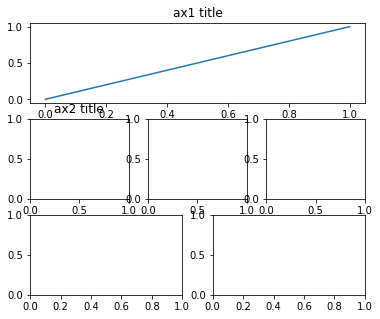

In [2]:
plt.figure(figsize = (6,5))
ax1 = plt.subplot(3,1,1)
ax1.set_title("ax1 title")
plt.plot([0,1],[0,1])
#这种情况下如果再数的话以334为标准了，
#把上面的第一行看成是3个列
ax2 = plt.subplot(334)
ax2.set_title("ax2 title")
ax3 = plt.subplot(335)
ax4 = plt.subplot(336)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)
plt.show()

# 多图，xy轴设置，还有多条直线

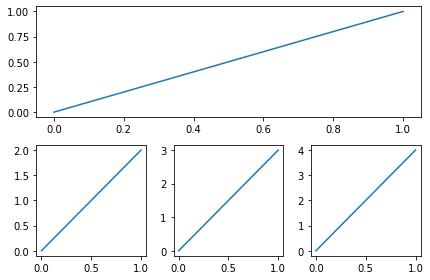

In [3]:
plt.figure(figsize = (6,4))
#plt.subplot(n_rows,n_cols,plot_num)
plt.subplot(211)
# figure splits into 2 rows, 1 col, plot to the 1st sub-fig
plt.plot([0, 1], [0, 1])
plt.subplot(234)
# figure splits into 2 rows, 3 col, plot to the 4th sub-fig
plt.plot([0, 1], [0, 2])
plt.subplot(235)
# figure splits into 2 rows, 3 col, plot to the 5th sub-fig
plt.plot([0, 1], [0, 3])
plt.subplot(236)
# figure splits into 2 rows, 3 col, plot to the 6th sub-fig
plt.plot([0, 1], [0, 4])
plt.tight_layout()
plt.show()

# 多图，xy轴设置 method 1: subplot2grid

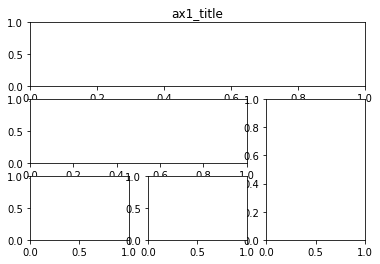

In [4]:
#method 1: subplot2grid
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
#第一个参数shape也就是我们网格的形状
#第二个参数loc,位置,这里需要注意位置是从0开始索引的
#第三个参数colspan跨多少列,默认是1
#第四个参数rowspan跨多少行,默认是1
ax1 = plt.subplot2grid((3,3),(0,0),colspan = 3,rowspan = 1)
#如果为他设置一些属性的话，如plt.title,则用ax1的话
#ax1.set_title(),同理可设置其他属性
ax1.set_title("ax1_title")
ax2 = plt.subplot2grid((3,3),(1,0),colspan = 2,rowspan = 1)
ax3 = plt.subplot2grid((3,3),(1,2),colspan = 1,rowspan = 2)
ax4 = plt.subplot2grid((3,3),(2,0),colspan = 1,rowspan = 1)
ax5 = plt.subplot2grid((3,3),(2,1),colspan = 1,rowspan = 1)
plt.show()

# 多图，xy轴设置 method 2:gridspec 

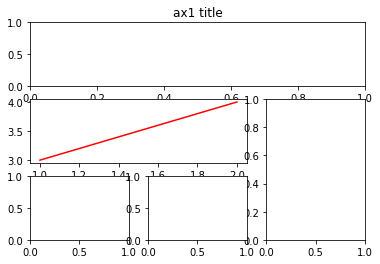

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
plt.figure()
gs = gridspec.GridSpec(3,3)
#use index from 0
ax1 = plt.subplot(gs[0,:])
ax1.set_title("ax1 title")
ax2 = plt.subplot(gs[1,:2])
ax2.plot([1,2],[3,4],'r')
ax3 = plt.subplot(gs[1:,2:])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])
plt.show()

# 多图分割 method 3 :easy to define structure

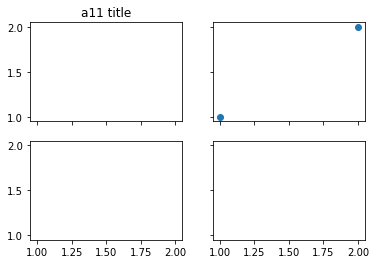

In [6]:
#method 3 :easy to define structure
#这种方式不能生成指定跨行列的那种
import matplotlib.pyplot as plt
import numpy as np
#(ax11,ax12),(ax13,ax14)代表了两行
#f就是figure对象,
#sharex：是否共享x轴
#sharey:是否共享y轴
f,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,sharex = True,sharey = True)
ax11.set_title("a11 title")
ax12.scatter([1,2],[1,2])
plt.show()

# 多图下的展示

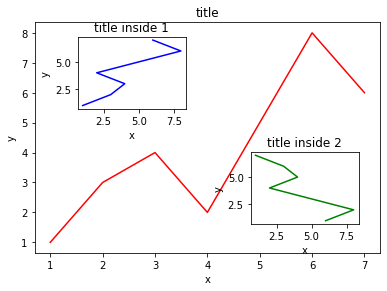

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]
#below are all percentage
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#使用plt.figure()显示的是一个空的figure
#如果使用fig.add_axes会添加轴
ax1 = fig.add_axes([left, bottom, width, height])# main axes
ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')
ax2 = fig.add_axes([0.2, 0.6, 0.25, 0.25]) # inside axes
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')
# different method to add axes
####################################
plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(y[::-1], x, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')
plt.show()

# 两函数相交

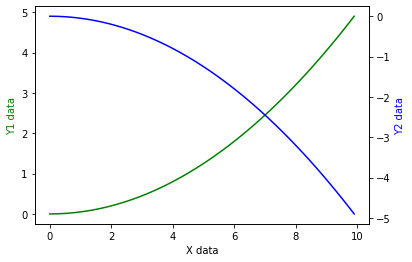

In [8]:
# 使用twinx是添加y轴的坐标轴
# 使用twiny是添加x轴的坐标轴
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10,0.1)
y1 = 0.05 * x ** 2
y2 = -1 * y1
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data',color = 'g')
ax2.set_ylabel('Y2 data',color = 'b')
plt.show()

# animation 动画

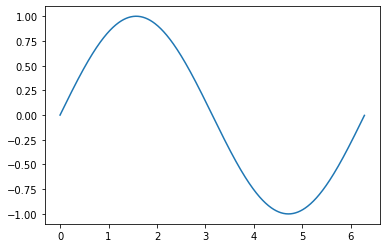

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
fig,ax = plt.subplots()
x = np.arange(0,2*np.pi,0.01)
#因为这里返回的是一个列表，但是我们只想要第一个值
#所以这里需要加,号
line, = ax.plot(x,np.sin(x))
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))#updata the data
    return line,
def init():
    line.set_ydata(np.sin(x))
    return line,
# call the animator. blit=True means only re-draw the parts that have changed.
# blit=True dose not work on Mac, set blit=False
# interval= update frequency
#frames帧数
ani = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init,
interval=20, blit=False)
plt.show()

# 在 命令行 或直接 python解释 才能看到 动图